#### Setup

In [1]:
%pip install -q scikit-learn pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.chdir('../')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#### Get data and Split into train test

In [4]:
#import and combine cluster data with preprocessed data
cluster_data = pd.read_csv(r'Data/Seattle_Building_Clusters.csv')
preprocessed_data = pd.read_csv(r'Data/Building_Data_Preprocessed.csv')

preprocessed_data = preprocessed_data.assign(GHGIntensityCluster = cluster_data['GHGIntensityCluster']) #move clusters to preprocessed data

preprocessed_data = preprocessed_data.drop('BuildingName', axis = 1) #drop string columns
preprocessed_data = preprocessed_data.drop('Address', axis = 1)
preprocessed_data = preprocessed_data.drop('Latitude', axis = 1) #Drop columns with negative values
preprocessed_data = preprocessed_data.drop('Longitude', axis = 1)#Drop columns with negative values


preprocessed_data = preprocessed_data.dropna()

#very ugly, i might add this to the preprocessing notebook so that the clusters are included in the data

X = preprocessed_data.drop('GHGIntensityCluster', axis=1)
y = preprocessed_data['GHGIntensityCluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Multi-nomial Naive Bayes

In [8]:
mnnb = MultinomialNB()

# Parameters for tuning
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20, 50, 100,],
    'force_alpha': [True, False],
    'fit_prior': [True, False]
}

# Grid search the parameters to hopefully improve accuracy
grid_search = GridSearchCV(mnnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) #accuracy is the % of correct predictions made
print(f'Multinomial Naive Bayes Accuracy: {accuracy:.4f}')

print('Multinomial Classification Report:')
print(classification_report(y_test, y_pred))

print('Multinomial Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Multinomial Naive Bayes Accuracy: 0.4933
Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       399
           1       0.27      0.40      0.32        81
           2       0.29      0.02      0.03       121
           3       0.30      0.22      0.26       143

    accuracy                           0.49       744
   macro avg       0.36      0.35      0.32       744
weighted avg       0.45      0.49      0.44       744

Multinomial Confusion Matrix:
[[301  42   4  52]
 [ 46  32   1   2]
 [ 71  29   2  19]
 [ 94  17   0  32]]


#### Complement Naive Bayes Classification

Complement Naive Bayes Accuracy: 0.4933
Compliment Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       399
           1       0.00      0.00      0.00        81
           2       0.24      0.23      0.24       121
           3       0.29      0.16      0.21       143

    accuracy                           0.49       744
   macro avg       0.28      0.30      0.28       744
weighted avg       0.40      0.49      0.44       744

Compliment Confusion Matrix:
[[316   0  43  40]
 [ 49   0  31   1]
 [ 77   0  28  16]
 [106   0  14  23]]


c:\Users\jfsal\Documents\DATA422_Fall2024_Team5-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jfsal\Documents\DATA422_Fall2024_Team5-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jfsal\Documents\DATA422_Fall2024_Team5-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

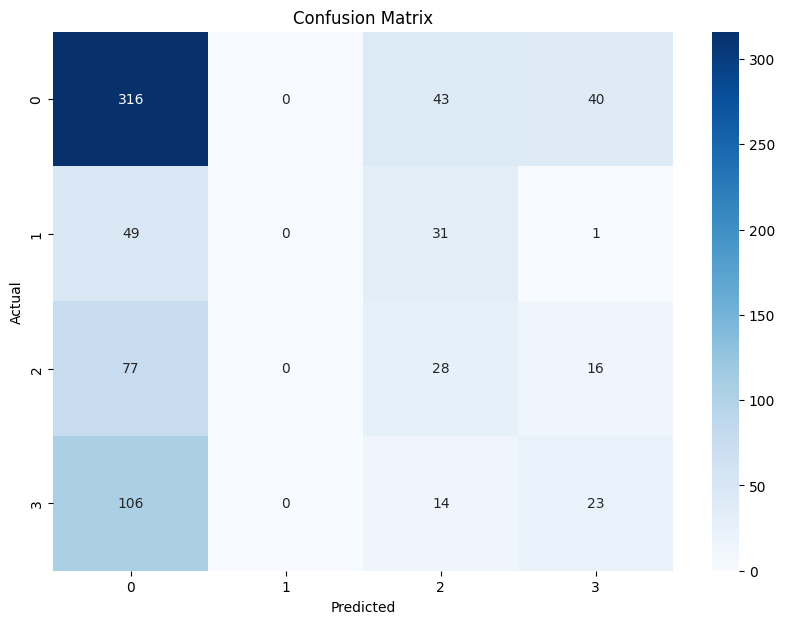

In [10]:
conb = ComplementNB ()

# Parameters for tuning
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20, 50, 100,],
    'force_alpha': [True, False],
    'fit_prior': [True, False],
}

# Grid search the parameters to hopefully improve accuracy
grid_search = GridSearchCV(conb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict
y_pred = grid_search.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Complement Naive Bayes Accuracy: {accuracy:.4f}')

print('Compliment Classification Report:')
print(classification_report(y_test, y_pred))

print('Compliment Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### Write Up
The accuracy of our models predictions is pretty bad despite the parameter tuning. With 49% suggesting that it is slightly better than randomly picking one of the four clusters to assign to. This may be because Naive Bayes wants the features to be independent which is likely not the case based on the covariance graph.

Examining the Classification reports, the precision value tells us how accurate the model is at predicting the different classes. Both of the models seem to perform fairly well at predicting class 0 but struggle to accurately assign the other classes. This is supported by the confusion matrix which shows that both models are predicting large numbers 301, and 316 out of the 399 to belong to class 0. It also appears to be predicting many cases of class 1 to be class 2 instead. Finally the recall values for both models suggest that the models are missing many instances of classes 1, 2, and 3.

Overall the first model, Multi-nomial naive bayes classification does out perform the second model, but only slightly based on the information in the recall matrix and classification report. Unfortunately this indicates that this model is likely not useful in terms of predicting emission intensity classes.